In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Pre-processing Steps

In [146]:

# set the seaborn run command for font parameters
sns.set(rc={'font.weight': 'bold'}, font_scale=1.3)

# Load the data
data = pd.read_csv('../data/crime_data_cleaned.csv')

# remove spaces from column names
data.columns = data.columns.str.replace(' ', '')

# format day month year hour minute second
data['DATEOCC'] = pd.to_datetime(data['DATEOCC'], format='%Y-%m-%d')

# subset data for plotting, Omit 2024 and 'Other' crime type
data = data.loc[
                (data['YEAR']!=2024)& 
                (data['crime_type']!='Other') 
                ]

print('This dataset shows {} observations and {} features'.format(data.shape[0], data.shape[1]))

This dataset shows 514373 observations and 37 features


### In this notebook, we will create the visualizations for the blog post
- We will show plots for count of crimes by type and category (property vs violent, burglary vs. assault)
- We will show YoY change count of crimes
- We will show clearance rate for crimes by type and category

### The visualizations require 3 functions, which we will create as follows
1.  barchart() - This function will create a bar chart taking appropriate inputs
3.  clearance_rate() - This function will create a clearance rate table
3.  plot_rates() - This function will plot the clearance rates
4.  change_table() - This function will create a table showing YoY change in crimes and clearance

### Create Resuable Functions to execute plots and tables

In [147]:
# this function produces a barplot for crime type or category by year
def barchart(x, hue, data, type):
    """
    This function produces a barplot for crime type or category by year
    
    :param x: str, the column name for the x-axis
    :param hue: str, the column name for the hue
    :param data: DataFrame, the data to be plotted
    :param type: str, updates the title based on the type of crime or category
    
    :return: Barplot png for crime type or category by year
    
    """
    # subset df
    if type == None:
        pass
    elif type == 'property':
        data = data[data['crime_type'] == 'Property']
    else:
        data = data[data['crime_type'] == 'Violent']

    # set fig size
    fig, ax = plt.subplots(figsize=(8, 4)) 
    # use sns countplot for the figure
    sns.countplot(x=x, hue=hue, data=data, palette='flare')
    if x=='crime_type':
        plt.title('Crime Type by Year', fontsize=20, fontweight='bold')
    else:
        if type == 'property':
            plt.title('Property Crime by Year', fontsize=20, fontweight='bold')
        else:
            plt.title('Violent Crime by Year', fontsize=20, fontweight='bold')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

### Plot crime type by year

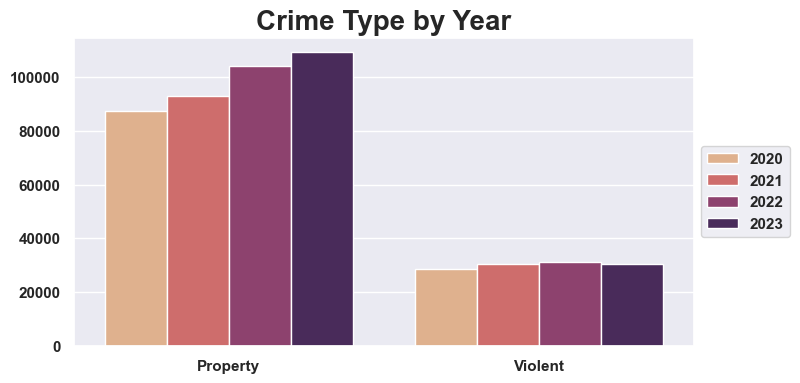

In [148]:
# set plot background
sns.set(style='darkgrid')

# plot crime type by year
barchart('crime_type', 'YEAR', data, None)

### Plot crime category by year

### Plot property crimes

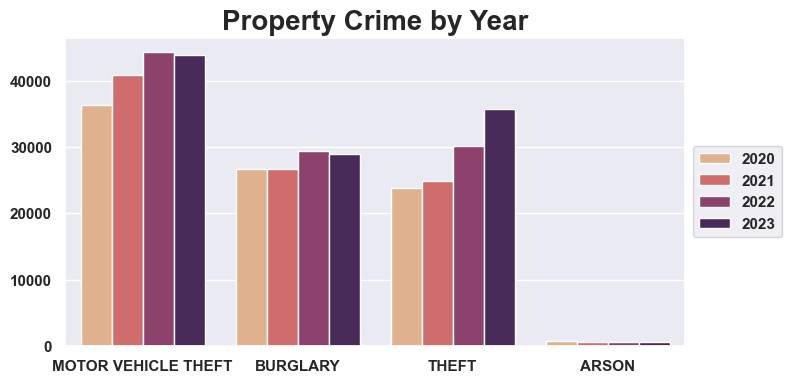

In [149]:
barchart('crime_category', 'YEAR', data, 'property')

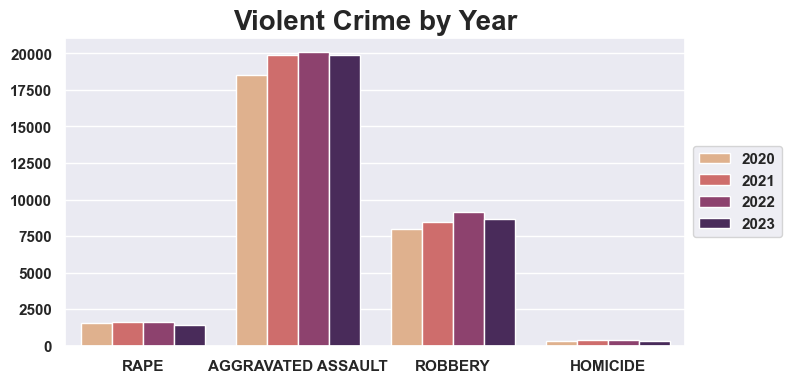

In [150]:
# plot violent crimes by year
barchart('crime_category', 'YEAR', data, 'violent')

### Create function to calculate clearance rate for different scenarios

In [151]:
# create function to calculate clearance rate
def clearance_rate(data,type):
    """
    This function calculates the clearance rate for crime type or category

    :param data: DataFrame, the data to be used for the calculation
    :param type: str, updates the calculation based on the type of crime or category

    :return: DataFrame, the clearance rate for crime type or category
    
    """
    if type == None: # calculate clearance rate for all crime types
            counts = data.groupby(['YEAR', 'crime_type'])['CrmCdDesc'].count()
            cleared = data.groupby(['YEAR', 'crime_type'])['cleared'].sum()
            rate = (cleared/counts).round(2)

            rate = rate.to_frame().reset_index()

            rate.columns = ['YEAR', 'crime_type', 'clearance_rate']

            return rate
    elif type == 'property': # calculate clearance rate for property crimes
            data = data[data['crime_type'] == 'Property']
            counts = data.groupby(['YEAR', 'crime_category'])['CrmCdDesc'].count()
            cleared = data.groupby(['YEAR', 'crime_category'])['cleared'].sum()
            rate = (cleared/counts).round(2)

            rate = rate.to_frame().reset_index()

            rate.columns = ['YEAR', 'crime_category', 'clearance_rate']

            return rate
    else: # calculate clearance rate for violent crimes
            data = data[data['crime_type'] == 'Violent']
            counts = data.groupby(['YEAR', 'crime_category'])['CrmCdDesc'].count()
            cleared = data.groupby(['YEAR', 'crime_category'])['cleared'].sum()
            rate = (cleared/counts).round(2)

            rate = rate.to_frame().reset_index()

            rate.columns = ['YEAR', 'crime_category', 'clearance_rate']

            return rate


### Create Plot function to plot clearance rates

In [152]:
# plot the clearance rates

def plot_rates(x, y, hue, data, type):
    """
    This function produces a barplot for clearance rates by crime category
    
    :param x: str, the column name for the x-axis
    :param y: str, the column name for the y-axis
    :param hue: str, the column name for the hue
    :param data: DataFrame, the data to be plotted
    
    """
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x=x, y=y, hue=hue, data=data, palette='flare')
    # set condition for the title
    if type == None:
        plt.title('Clearance Rate by Crime Category', fontsize=20, fontweight='bold')
    elif type == 'property':
        plt.title('Clearance Rate for Property Crimes', fontsize=20, fontweight='bold')
    else:
        plt.title('Clearance Rate for Violent Crimes', fontsize=20, fontweight='bold')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('')
    plt.ylabel('Clearance Rate')
    plt.show()


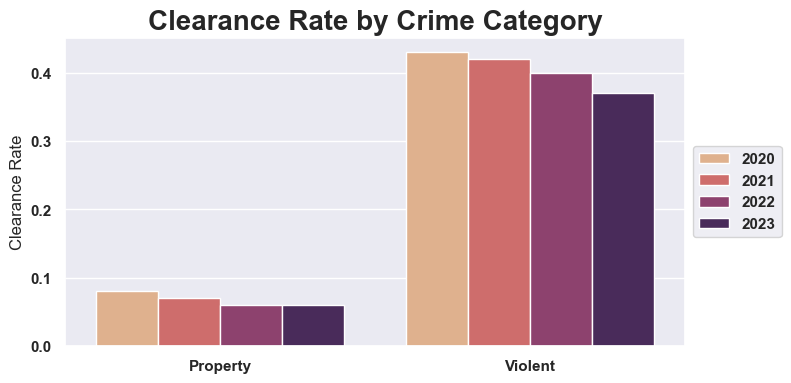

In [153]:
# calculate clearance for all categories, set 2nd argument to None
rate = clearance_rate(data, None)

plot_rates('crime_type', 'clearance_rate', 'YEAR',rate, None)

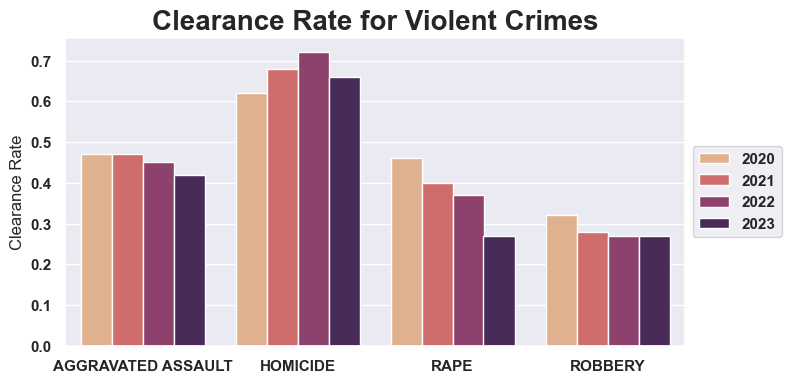

In [154]:
# calculate clearance for violent crimes, set 2nd argument to 'violent'
rate = clearance_rate(data, 'violent')

plot_rates('crime_category', 'clearance_rate','YEAR', rate, 'violent')

In [ ]:
# calculate clearance for property crimes, set 2nd argument to 'property'
rate = clearance_rate(data, 'property')

plot_rates('crime_category', 'clearance_rate','YEAR', rate, 'property')

### Create function to calculate YoY change in crimes and clearance rates

In [155]:
def change_table(df,type):
    # create condition for type of crime
    if type == 'violent':
        df = data[data['crime_type'] == 'Violent']
    elif type == 'property':
        df = data[data['crime_type'] == 'Property']
    else:
        pass   
    
    if type == None: # create pivot table for all crime types
        table = df.pivot_table(index='crime_type', columns='YEAR', values='CrmCdDesc', aggfunc='count')
    else:# create pivot table for violent or property crimes
        table = df.pivot_table(index='crime_category', columns='YEAR', values='CrmCdDesc', aggfunc='count')
    # calculate the percentage change
    difference = table.pct_change(axis=1).round(2).reset_index()

    # drop 2020
    difference = difference.drop(columns=2020)
    
    return difference

In [156]:
# func to plot heatmap
def plot_heatmap(data, type):
    """
    This function produces a heatmap for the percentage change in crime rates by year
    
    :param data: DataFrame, the data to be plotted
    :param type: str, updates the title based on the type of crime or category
    
    """
    fig, ax = plt.subplots(figsize=(10, 4))
    # set condition to crime type
    if type == None: # if none include all crimes
        sns.heatmap(data.set_index('crime_type'), annot=True, cmap='flare', fmt=".0%", linewidths=1)
    else: 
        sns.heatmap(data.set_index('crime_category'), annot=True, cmap='flare', fmt=".0%", linewidths=1)
    if type == 'violent': # set title for violent crimes
        plt.title('Percentage Change in Violent Crime Rates by Year', fontsize=20, fontweight='bold')
    elif type == 'property': # set title for property crimes
        plt.title('Percentage Change in Property Crime Rates by Year', fontsize=20, fontweight='bold')
    else: # set title for all crimes
        plt.title('Percentage Change in Crime Rates by Year', fontsize=20, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

### Plot Year over Year crime change

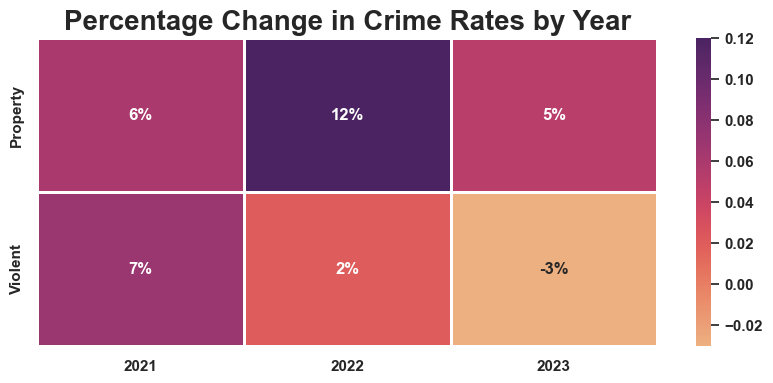

In [157]:
yoy_crime_change = change_table(data, None)

plot_heatmap(yoy_crime_change, None)

### Plot Year over Year violent crime change

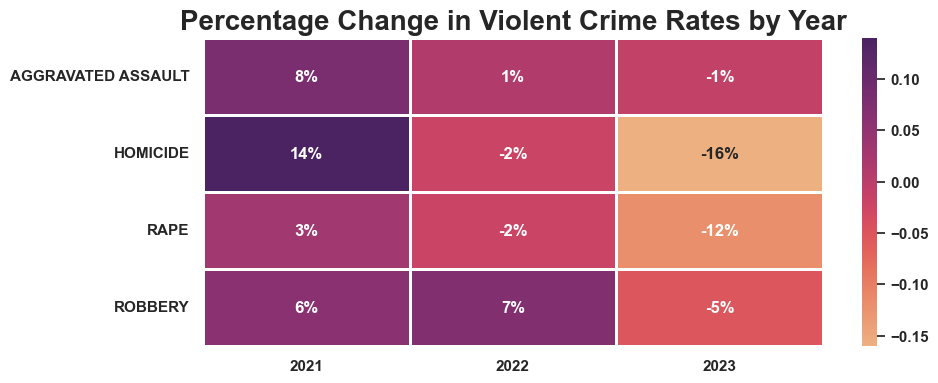

In [158]:
yoy_violent_crime_change = change_table(data, 'violent')

plot_heatmap(yoy_violent_crime_change, 'violent')

### Plot Year over Year property crime change

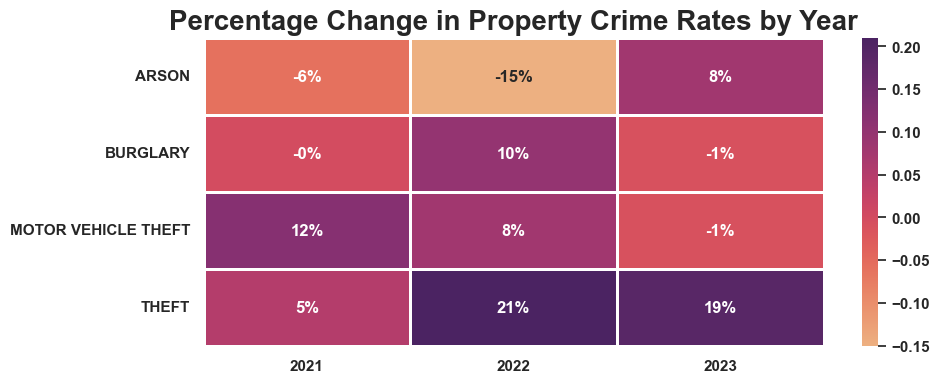

In [159]:
yoy_property_crime_change = change_table(data, 'property')

plot_heatmap(yoy_property_crime_change, 'property')

### Plot the daily crimes reported for 2020

Text(0, 0.5, 'Daily Crimes Reported')

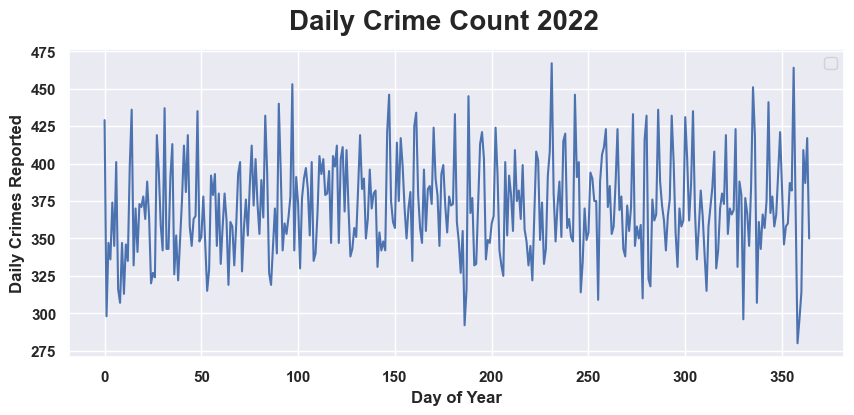

In [160]:
# subset data 
daily = data[data['YEAR'] == 2022]

# group by day of year and count of crime description to get counts
daily = daily.groupby(data['DATEOCC'].dt.dayofyear)['CrmCdDesc'].count().to_frame().reset_index()

# update columns for presentation
daily.columns = ['dayofyear','total_crimes']

# subset columns
daily = daily.loc[:,['total_crimes']]

# plot daily crime count
daily.plot(kind='line', figsize=(10, 4))
# remove legend
plt.suptitle('Daily Crime Count 2022', fontsize=20, fontweight='bold')
plt.legend('')
plt.xlabel('Day of Year', fontsize=12, fontweight='bold')
plt.ylabel('Daily Crimes Reported', fontsize=12, fontweight='bold')

### Create an Interactive Chloropleth Map
These maps are quite challenging to build and there is minimal documentation available.<br>
I found a good tutorial that can serve as a companion, reviewing 3 different types of maps<br>
[Interactive Maps Tutorial](https://medium.com/geekculture/three-ways-to-plot-choropleth-map-using-python-f53799a3e623) <br>

We will use the Folium Python package.  There are 2 steps involved in building this map 
<br>
1.  Acquire the geojson data -  This data serves as the boundaries for the map and is an essential layer, where the data in the geojson file, must match the data in the dataset in the `AREANAME` column.  You can create geojson data, which is quite challenging.  Or you can look to get the file from an existing project.  If you're working on a government dataset, you can find the appropriate geojson data on GitHub <br><br>

2.  Colorscale effect - Create a dataframe with 2 columns, namely `AREANAME` and count of crimes in the region<br>
*Once again - the `AREANAME` must match the geojson data for the map to render correctly*<br>
<br>
Geojson data is widely available on GitHub.<br>


### Get the Geojson Data

In [161]:
#Import modules for acquiring geojson
from urllib.request import urlopen
import json

#Import geojson from Github
with urlopen('https://raw.githubusercontent.com/sidneykung/LA_crime_forecasting/main/data/LAPD_Divisions.json') as response:
    lapd_divisions = json.load(response)  #Collect geojson data from Github

### Extract Regional Crime Data

In [162]:
# group data by areaname and crime count
area_crime = data.groupby('AREANAME')['CrmCdDesc'].count().to_frame().reset_index()

# update index position 8 and 18 to full city name as folium map does not recognize the abbreviation
area_crime.iloc[8,0] = 'North Hollywood'
area_crime.iloc[18,0] = 'West Los Angeles'

# change col names to match geojson
area_crime.columns = ['name','count']

area_crime

,name,count
0,77th Street,31115
1,Central,36926
2,Devonshire,20935
3,Foothill,15827
4,Harbor,20160
5,Hollenbeck,18795
6,Hollywood,27188
7,Mission,19155
8,North Hollywood,25799
9,Newton,26378


In [163]:
#import folium
import folium

#Creaate a map object for choropleth map
#Set location to your location of interest (latitude and longitude )
map0 = folium.Map(location=[34.0549,-118.2426], zoom_start=10)

#Create choropleth map object with key on TOWNNAME
folium.Choropleth(geo_data = lapd_divisions,#Assign geo_data to your geojson file
    name = "choropleth",
    data = area_crime,#Assign dataset of interest
    columns = ['name','count'],#Assign columns in the dataset for plotting
    key_on = 'feature.properties.name',#Assign the key that geojson uses to connect with dataset
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    legend_name = 'Count of Crimes by Area').add_to(map0)

#Create style_function
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

#Create highlight_function
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

#Create popup tooltip object
NIL = folium.features.GeoJson(
    lapd_divisions,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],
        aliases=['Area'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")))

#Add tooltip object to the map
map0.add_child(NIL)
map0.keep_in_front(NIL)
folium.LayerControl().add_to(map0)

# load the map
map0